# DATA CHECKING

In [1]:
#Import library pandas numpy plotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Create a DataFrame
churn = pd.read_csv("https://raw.githubusercontent.com/maulanadiooo/digitalskola/1a44d05574e57a16221777b799854d54b517a49f/Churn_Modelling.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Check Type every feature
churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
#Check size dataframe
churn.shape

(10000, 14)

In [5]:
#Check missing value
churn.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#Describe data
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#Delete Duplicate
churn.drop_duplicates(inplace= True)
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DATA VISUALIZATION

In [8]:
#Creating pivot
df_pivot = pd.pivot_table(data=churn, values= ['Balance'], index= ['Exited', 'Gender'], columns= ['Geography'], aggfunc=np.average)
df_pivot

Balance                             
Geography            France        Germany         Spain
Exited Gender                                           
0      Female  58424.310061  118828.514362  56594.820688
       Male    61774.503758  119896.529105  61871.626285
1      Female  67755.162630  119673.872321  71997.673680
       Male    75710.827800  121202.242432  73167.867802

In [9]:
#Data Prepocessing
df_1 = churn.drop(['CustomerId','Surname','RowNumber'], axis= 1)
df_1.dtypes
df_1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


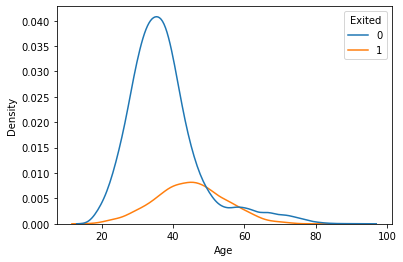

In [10]:
#Data Visualization
sns.kdeplot(data=df_1, x='Age', hue='Exited')

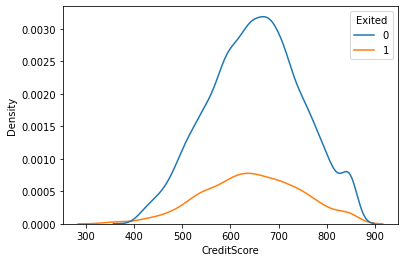

In [11]:
#Data Visualization
sns.kdeplot(data=df_1, x='CreditScore', hue='Exited')

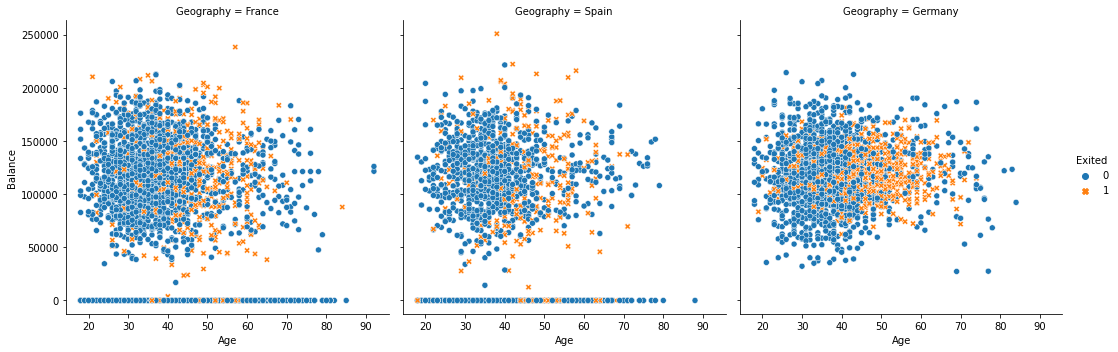

In [12]:
#Data Visualization
sns.relplot(data= df_1, x= 'Age', y='Balance', col= 'Geography', style= 'Exited', hue= 'Exited')

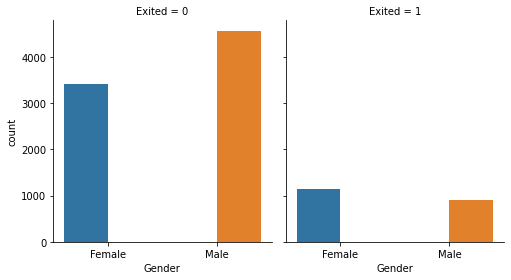

In [13]:
#Data Visualization
sns.catplot(data=df_1,x='Gender',hue='Gender',col= 'Exited',kind='count', height= 4, aspect= .9)

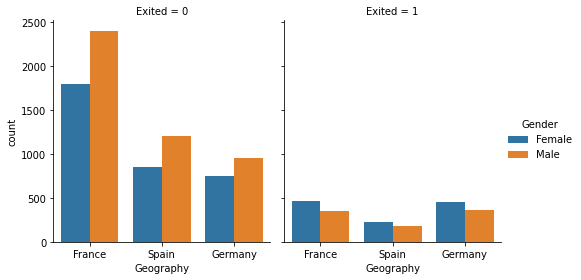

In [14]:
#Data Visualization
sns.catplot(data=df_1,x='Geography',hue='Gender',col= 'Exited',kind='count', height= 4, aspect= .9)

In [15]:
#View Correlation
a = churn.corr()

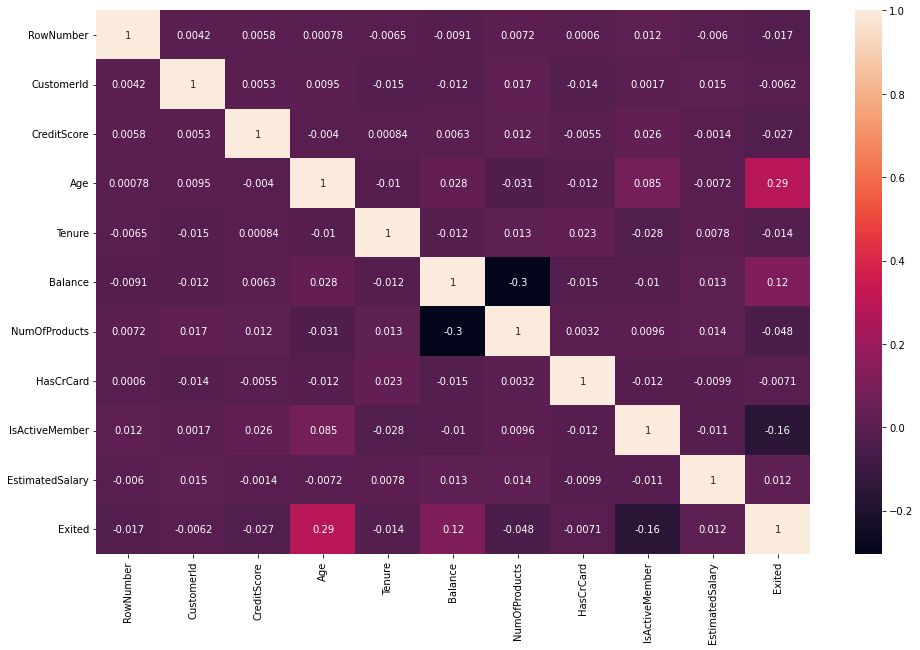

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(a, annot=True)

# DATA PREPOCESSING

In [17]:
#Creat a data for descriptive data
df_2 = df_1[["Geography", 'Age']]

In [18]:
df_2 = pd.pivot_table(data=df_2, values="Age", index='Geography', aggfunc=[np.mean])

In [19]:
df_2

,mean
,Age
Geography,
France,38.511767
Germany,39.771622
Spain,38.890997


In [20]:
#Creat a data for descriptive data
df_3 = df_1[["Geography", 'Balance']]

In [21]:
df_3 = pd.pivot_table(data=df_3, values="Balance", index='Geography', aggfunc=[np.mean])

In [22]:
df_3

,mean
,Balance
Geography,
France,62092.636516
Germany,119730.116134
Spain,61818.147763


In [23]:
#Merge database
df_1 = pd.merge(df_1,df_2, how='left', on='Geography')

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [24]:
df_1 = pd.merge(df_1,df_3, how='left', on='Geography')

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [25]:
df_1.drop(['Geography'], axis=1, inplace=True)

In [26]:
#OneHotEnconding using pandas
df_1 = pd.get_dummies(df_1, columns=['Gender'], drop_first=True)

In [27]:
#Check database after prepocessing
df_1.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,"(mean, Age)","(mean, Balance)",Gender_Male
9995,771,39,5,0.00,2,1,0,96270.64,0,38.511767,62092.636516,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,38.511767,62092.636516,1
9997,709,36,7,0.00,1,0,1,42085.58,1,38.511767,62092.636516,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,39.771622,119730.116134,1
9999,792,28,4,130142.79,1,1,0,38190.78,0,38.511767,62092.636516,0


## Check Outlier

In [28]:
# Inter-Quantile Range
Q1 = df_1["CreditScore"].quantile(q = 0.25)
Q3 = df_1["CreditScore"].quantile(q = 0.75)

IQR = Q3 - Q1
# Outlier
upper_inner_fence = Q3 + 1.5 * IQR
lower_inner_fence = Q1 - 1.5 * IQR
print("Above upper outer fence:")
df_1["CreditScore"][df_1["CreditScore"] > upper_inner_fence]
print("Below lower inner fence:")
df_1["CreditScore"][df_1["CreditScore"] < lower_inner_fence]


Above upper outer fence:
Below lower inner fence:


7       376
942     376
1193    363
1405    359
1631    350
1838    350
1962    358
2473    351
2579    365
8154    367
8723    350
8762    350
9210    382
9356    373
9624    350
Name: CreditScore, dtype: int64

In [29]:
#Replace Oulier
for i in df_1["CreditScore"][df_1["CreditScore"] < lower_inner_fence]:
  df_1['CreditScore'].replace(i, df_1['CreditScore'].mean(), inplace=True)


# FEATURE ENGINEERING

## Split Data

In [30]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold

In [40]:
X = df_1.drop(['Exited','HasCrCard'], axis=1)
y = df_1['Exited']

In [41]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,"(mean, Age)","(mean, Balance)",Gender_Male
0,619.0,42,2,0.00,1,1,101348.88,38.511767,62092.636516,0
1,608.0,41,1,83807.86,1,1,112542.58,38.890997,61818.147763,0


In [42]:
y.tail(2)

9998    1
9999    0
Name: Exited, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify= y)

## Imbalance DataSet

In [44]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(sampling_strategy=0.5)
X_train, y_train = undersampling.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 0.8)
X_train, y_train = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
'''from imblearn.over_sampling import RandomOverSampler
oversampling = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversampling.fit_resample(X_train,y_train)'''

'from imblearn.over_sampling import RandomOverSampler\noversampling = RandomOverSampler(sampling_strategy=0.5)\nX_over, y_over = oversampling.fit_resample(X_train,y_train)'

## Scaling Data

In [46]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [47]:
scaler = StandardScaler()
minmax = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# MODELLING

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [65]:
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    specificity = round((tn) / (tn+fp) * 100, 2)
    npv = round((tn) / (tn+fn) * 100, 2)
    fscore = round((2 * precision * recall)/ (precision + recall),2)
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('Specificity:', specificity, '%')
    print('NPV        :', npv, '%')
    print('F-Score    :', fscore, '%')

## KNN

In [66]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [67]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [68]:
classification_eval(y_train, y_train_pred, 'KNN Training Perf.')

Evaluation Model: KNN Training Perf.
[[2829  431]
 [ 601 2007]]
Accuracy   : 82.41 %
Precision  : 82.32 %
Recall     : 76.96 %
Specificity: 86.78 %
NPV        : 82.48 %
F-Score    : 79.55 %


In [69]:
classification_eval(y_test, y_test_pred, 'KNN Testing Perf.')

Evaluation Model: KNN Testing Perf.
[[1323  270]
 [ 148  259]]
Accuracy   : 79.1 %
Precision  : 48.96 %
Recall     : 63.64 %
Specificity: 83.05 %
NPV        : 89.94 %
F-Score    : 55.34 %


## Random Forest

In [70]:
ranfor = RandomForestClassifier(max_depth=5)
ranfor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

In [72]:
classification_eval(y_train, y_train_pred, 'Ranfor Training Perf.')

Evaluation Model: Ranfor Training Perf.
[[2960  300]
 [ 678 1930]]
Accuracy   : 83.33 %
Precision  : 86.55 %
Recall     : 74.0 %
Specificity: 90.8 %
NPV        : 81.36 %
F-Score    : 79.78 %


In [73]:
classification_eval(y_test, y_test_pred, 'Ranfor Testing Perf.')

Evaluation Model: Ranfor Testing Perf.
[[1432  161]
 [ 157  250]]
Accuracy   : 84.1 %
Precision  : 60.83 %
Recall     : 61.43 %
Specificity: 89.89 %
NPV        : 90.12 %
F-Score    : 61.13 %


##Decision Tree

In [74]:
dectree = DecisionTreeClassifier(max_depth=6)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [76]:
classification_eval(y_train, y_train_pred, 'Dectree Training Perf.')

Evaluation Model: Dectree Training Perf.
[[2838  422]
 [ 680 1928]]
Accuracy   : 81.22 %
Precision  : 82.04 %
Recall     : 73.93 %
Specificity: 87.06 %
NPV        : 80.67 %
F-Score    : 77.77 %


In [77]:
# Testing Performance
classification_eval(y_test, y_test_pred, 'Dectree Testing Perf.')

Evaluation Model: Dectree Testing Perf.
[[1359  234]
 [ 151  256]]
Accuracy   : 80.75 %
Precision  : 52.24 %
Recall     : 62.9 %
Specificity: 85.31 %
NPV        : 90.0 %
F-Score    : 57.08 %


## XG BOOST

In [78]:
import xgboost as xgb

In [79]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
y_pred_tr = clf.predict(X_train)
y_pred = clf.predict(X_test)
classification_eval(y_train, y_pred_tr, 'XGboost train')
classification_eval(y_test, y_pred, 'XGboost')

Evaluation Model: XGboost train
[[2975  285]
 [ 614 1994]]
Accuracy   : 84.68 %
Precision  : 87.49 %
Recall     : 76.46 %
Specificity: 91.26 %
NPV        : 82.89 %
F-Score    : 81.6 %
Evaluation Model: XGboost
[[1432  161]
 [ 155  252]]
Accuracy   : 84.2 %
Precision  : 61.02 %
Recall     : 61.92 %
Specificity: 89.89 %
NPV        : 90.23 %
F-Score    : 61.47 %


# EVALUATION MODEL

## Cross Validation

In [80]:
# Stratified 10-Fold CV
skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)

i = 0
for train_idx, test_idx in skfold.split(X, y):
    print('Fold number: ', i)
    
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
    
    print('Proportional class distribution in train data:\n', y_train_fold.value_counts() / y_train_fold.count(), '\n')
    print('Proportional class distribution in test data:\n', y_test_fold.value_counts() / y_test_fold.count(), '\n\n')
    
    i += 1

Fold number:  0
Proportional class distribution in train data:
 0    0.796375
1    0.203625
Name: Exited, dtype: float64 

Proportional class distribution in test data:
 0    0.796
1    0.204
Name: Exited, dtype: float64 


Fold number:  1
Proportional class distribution in train data:
 0    0.796375
1    0.203625
Name: Exited, dtype: float64 

Proportional class distribution in test data:
 0    0.796
1    0.204
Name: Exited, dtype: float64 


Fold number:  2
Proportional class distribution in train data:
 0    0.79625
1    0.20375
Name: Exited, dtype: float64 

Proportional class distribution in test data:
 0    0.7965
1    0.2035
Name: Exited, dtype: float64 


Fold number:  3
Proportional class distribution in train data:
 0    0.79625
1    0.20375
Name: Exited, dtype: float64 

Proportional class distribution in test data:
 0    0.7965
1    0.2035
Name: Exited, dtype: float64 


Fold number:  4
Proportional class distribution in train data:
 0    0.79625
1    0.20375
Name: Exited, 

## Hyperparameter Tunning

#### Randomized Serach KNN

In [81]:
from sklearn.model_selection import RandomizedSearchCV


In [82]:
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 15, num = 5)]

In [83]:
weights = ['uniform', 'distance']

In [84]:
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

In [85]:
p = [1,2]

In [87]:
random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'p': p}

In [88]:
random_grid

{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'n_neighbors': [1, 4, 8, 11, 15],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}

In [89]:
knn_random = RandomizedSearchCV(estimator= knn, param_distributions= random_grid, n_iter=10, cv= 5,random_state= 12, n_jobs=-1, scoring='f1') 

In [90]:
knn_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=9,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 4, 8, 11, 15],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=12, refit=True,
                   return_train_score=False, sc

In [91]:
cvknn = knn_random.cv_results_
for mean_score, params in zip(cvknn["mean_test_score"], cvknn["params"]):
    print(np.round(mean_score, 2), params)

0.72 {'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'algorithm': 'kd_tree'}
0.72 {'weights': 'uniform', 'p': 1, 'n_neighbors': 11, 'algorithm': 'auto'}
0.73 {'weights': 'uniform', 'p': 2, 'n_neighbors': 11, 'algorithm': 'auto'}
0.75 {'weights': 'distance', 'p': 2, 'n_neighbors': 4, 'algorithm': 'auto'}
0.75 {'weights': 'uniform', 'p': 2, 'n_neighbors': 1, 'algorithm': 'kd_tree'}
0.75 {'weights': 'distance', 'p': 1, 'n_neighbors': 1, 'algorithm': 'kd_tree'}
0.69 {'weights': 'uniform', 'p': 1, 'n_neighbors': 8, 'algorithm': 'auto'}
0.73 {'weights': 'uniform', 'p': 2, 'n_neighbors': 11, 'algorithm': 'brute'}
0.75 {'weights': 'distance', 'p': 1, 'n_neighbors': 8, 'algorithm': 'ball_tree'}
0.75 {'weights': 'distance', 'p': 1, 'n_neighbors': 15, 'algorithm': 'auto'}


In [92]:
knn_random.best_params_

{'algorithm': 'auto', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

In [93]:
rs_knn = knn_random.best_estimator_
y_pred = rs_knn.predict(X_test)
classification_eval(y_test,y_pred,'Knn best param')

Evaluation Model: Knn best param
[[1306  287]
 [ 158  249]]
Accuracy   : 77.75 %
Precision  : 46.46 %
Recall     : 61.18 %
Specificity: 81.98 %
NPV        : 89.21 %
F-Score    : 52.81 %


## Permutation Feature Importance


In [94]:
!pip install eli5

     |████████████████████████████████| 106 kB 9.9 MB/s 


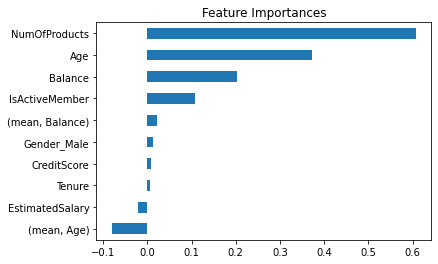

In [96]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=knn,scoring='r2', n_iter=5, random_state=27)
perm.fit (X_test, y_test)
columns= X_test.columns.to_list()
feature_importance = perm.feature_importances_
fimportance = pd.Series(feature_importance, columns).sort_values(ascending=False)

fimportance.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importances')
plt.show()